In [1]:
%matplotlib inline 
#Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import scipy.linalg as la # функции линейной алгебры
import math as math

### Задача №6.3. Спектральный метод для линейной краевой задачи.

In [2]:
#Зададим функцию в правой части: u''(x) = f(x)
f = lambda x: np.exp(x)
u = lambda x: np.exp(x) + 6*x + 8

#Зададим границы отрезка и максимальное число узлов
n = 20
left = -1
right = 1

#Зададим граничные условия
a = u(left)
b = u(right)

In [3]:
#Функция, для вычисления узлов Чебышева 
def Chebyshev_nodes(left, right, n):
    i = np.arange(n)
    x_n = (left + right + (right - left) * np.cos(np.pi/(2*n) + np.pi * i / n))/2
    return x_n

In [4]:
#для того, чтобы вычислить коэффициенты разложения, воспользуемся методом неопределенных коэф.
def method_of_undetermined_coefficients(x, x0):
    k = len(x)
    A = np.ones((k,k))
    for i in range(1, k):
        A[i] = (x - x0)**i / math.factorial(i)
    #print(A)
    b = np.zeros(k)
    b[2] = 1
    return np.linalg.solve(A, b)

In [5]:
def Spectral_method(f, n, left, right, a, b):
    x_k = Chebyshev_nodes(left, right, n)
    #раскладываем по всем точкам, включая граничные, поэтому в массив х добавляем границы
    x = np.zeros(n+2)
    x[0]= left
    x[n+1] = right
    for i in range(1, n+1):
        x[i] = x_k[i-1] 
    
    #в конечной системе уравнений берем только узлы Чебышева
    A = np.zeros((n,n))
    F = f(x_k)
    for i in range(n):
        #вектор коэффициентов, полученных методом неопр.коэф.
        temp = method_of_undetermined_coefficients(x, x_k[i])
        #отбрасываем константы
        F[i] = F[i] - temp[0] * a - temp[len(x)-1] * b
        #в конечную систему записываем temp, отбросив последний и первый коэф.
        #так как они соответствуют константам
        for j in range(0, n):
            A[i][j] = temp[j+1]
    #print(A, F)
    return (x_k, np.linalg.solve(A, F))

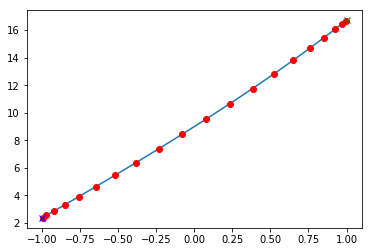

In [6]:
x, U = Spectral_method(f, n, left, right, a, b)
#график точного решения и нашего
xx = np.linspace(left, right, 10000)
plt.plot(xx, u(xx))
plt.plot(x, U, 'ro')
plt.plot(left, a, 'bx')
plt.plot(right, b, 'gx')

### Построим график зависимости ошибки от числа узлов в логарифмической шкале.

In [7]:
Err = np.zeros(n)
for i in range (1, n+1):
    x, U = Spectral_method(f, i, left, right, a, b)
    uex = u(x)
    Err[i-1] = np.linalg.norm(U - uex)

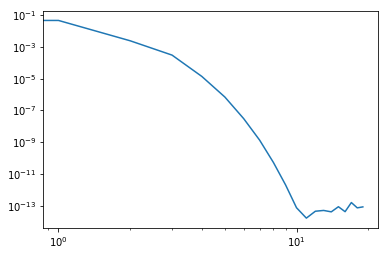

In [8]:
x = np.linspace(0, n-1, n)
#plt.semilogy(x, Err)
plt.loglog(x, Err)